# Sample Code of Jackknife Estimator

In [1]:
import numpy as np
import sympy
from matplotlib import pyplot as plt

Confirm that `numpy.random.randn` generates the normal distribution.

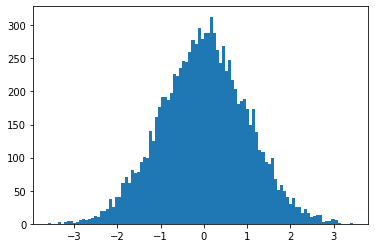

In [2]:
x = np.random.randn(10000)
fig, ax = plt.subplots(facecolor='w')
n, bins, _ = ax.hist(x, bins=100)

Calculates the kurtosis $U_N$ of the given data and see the sample-number dependence.

In [3]:
def simple_estimator(r):
    r2 = r ** 2
    r4 = r ** 4
    return np.average(r4)/np.average(r2)**2

In [4]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [simple_estimator(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")

16 2.6696052026922716
32 2.824106586907407
64 2.9050796406193515
128 2.953713443091351
256 2.9782266454583377


Plots $N$-dependence.

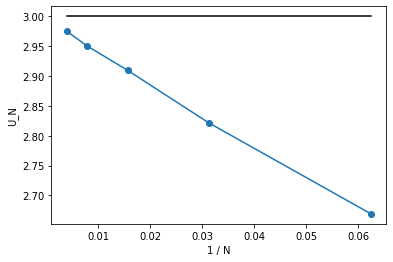

In [5]:
samples = np.array([16,32,64,128,256])
y = []
n_trials = 128**2
for n in samples:
    u = [simple_estimator(np.random.randn(n)) for _ in range(n_trials)]
    y.append(np.average(u))
x = 1.0/samples
y_theory = [3.0 for _ in x]
fig, ax = plt.subplots(facecolor='w')
plt.xlabel("1 / N")
plt.ylabel("U_N")
ax.patch.set_alpha(1.0)
ax.plot(x,y,"-o",label="Simple")
ax.plot(x,y_theory,"-", label="3", color="black")
plt.show()

See the sample-number dependene of $\left< x^2\right>$ and $\left< x^4\right>$.

In [6]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
y = []
for n in samples:
    r2 = []
    r4 = []
    for _ in range(n_trials):
        r = np.random.randn(n)
        r2.append(np.average(r**2))
        r4.append(np.average(r**4))
    print(f"{n} {np.average(r2)} {np.average(r4)}")

16 0.999465562070453 3.005844670875974
32 1.0008607815305237 3.0064247878521364
64 1.0003747354059787 3.0043562495298435
128 1.0002104586806406 2.9953216856061777
256 1.0002008929927537 3.000092614618111


See the sample-number dependene of $1/\left< x^2\right>^2$.

In [7]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
y = []
for n in samples:
    r2_inv2 = []
    for _ in range(n_trials):
        r = np.random.randn(n)
        r2_inv2.append(1.0/np.average(r**2)**2)
    print(f"{n} {np.average(r2_inv2)}")

16 1.523986713676061
32 1.2230239814398973
64 1.0972568420760895
128 1.0468718681879718
256 1.0229637768601192


See the sample-number dependene of $1/\left< x^2\right>^2$ with theoretical values.

In [8]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
y = []
var = 1.0
for n in samples:
    r2_inv2 = []
    for _ in range(n_trials):
        r = np.random.randn(n)
        r2_inv2.append(1.0/np.average(r**2)**2)
    print(f"{n} {np.average(r2_inv2)} {var**-2 + 6.0/n/var**2}")

16 1.5328851827208179 1.375
32 1.2240910225223303 1.1875
64 1.1071337688851866 1.09375
128 1.0482377262221787 1.046875
256 1.0238035516550532 1.0234375


Same as the above but with a different value of variance.

In [9]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
y = []
var = 2.0
for n in samples:
    r2_inv2 = []
    for _ in range(n_trials):
        r = np.random.normal(loc=0.0, scale=np.sqrt(var), size = n)
        r2_inv2.append(1.0/np.average(r**2)**2)
    print(f"{n} {np.average(r2_inv2)} {var**-2 + 6.0/n/var**2}")

16 0.374463420490003 0.34375
32 0.30413179388248746 0.296875
64 0.2752820559325847 0.2734375
128 0.2621156513989086 0.26171875
256 0.25623244921995114 0.255859375


Jackknife resampling method.

In [10]:
def jackknife_estimator(r):
    divs = np.array(sympy.divisors(n))
    idx = np.abs(divs-np.sqrt(len(r))).argmin()
    bin_size = divs[idx]
    r2 = r ** 2
    r4 = r ** 4
    u_all = np.average(r4)/np.average(r2)**2
    r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    u_jn = []
    m = len(r) // bin_size
    for i in range(m):
        r2_i = np.average(np.delete(r2,i))
        r4_i = np.average(np.delete(r4,i))
        u_jn.append(r4_i/r2_i**2)
    return m*u_all - (m-1)*np.average(u_jn)    

In [ ]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [jackknife_estimator(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")

16 2.9656358789090222
32 3.002123939286313
64 2.985814912428745


Use `resample` package.

In [ ]:
!pip install resample
import resample

In [ ]:
def jackknife_estimator_resample(r):
    divs = np.array(sympy.divisors(n))
    idx = np.abs(divs-np.sqrt(len(r))).argmin()
    bin_size = divs[idx]
    m = len(r) // bin_size
    sample = np.zeros((m, 2))
    sample[:, 0] = [np.average(r[i:i+bin_size]**2) for i in range(0, len(r), bin_size)]
    sample[:, 1] = [np.average(r[i:i+bin_size]**4) for i in range(0, len(r), bin_size)]
    def f(vals):
        return np.average(vals[:, 1]) / np.average(vals[:, 0])**2
    return resample.jackknife.bias_corrected(f, sample)   

In [ ]:
samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [jackknife_estimator_resample(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")